# **Scope of the problem**

"In the context of financial markets, the problem is to forecast the future stock prices of a company based on historical(past) data. The dataset contains columns for 'Date,' 'Open,' 'High,' 'Low,' 'Close,' 'Adj Close,' and 'Volume.' The objective is to develop an accurate time series forecasting model to predict future stock prices, facilitating investment decisions and risk management."

## **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Reading the data**

In [2]:
data = pd.read_excel("D:\Project_csp\company stock prices 1.xlsx")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


## **EDA**

In [3]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Here It shows that there are No Null Values in the DataSet

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


In [5]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,753,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,2022-04-17 10:23:25.577689344,414.903107,421.117954,408.519270,414.796653,414.796653,7.060370e+06
min,2020-10-19 00:00:00,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,2021-07-20 00:00:00,311.570007,319.799988,308.850006,313.480011,313.480011,3.629200e+06
50%,2022-04-18 00:00:00,418.399994,425.260010,411.880005,416.029999,416.029999,5.277700e+06
75%,2023-01-17 00:00:00,519.900024,526.380005,513.789978,519.780029,519.780029,7.973300e+06
max,2023-10-16 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08
std,NaN,135.039753,135.568500,134.016834,134.669664,134.669664,7.470407e+06


## **Pairplot**
To Understand the best set of features to explain a relationship between Two Variables

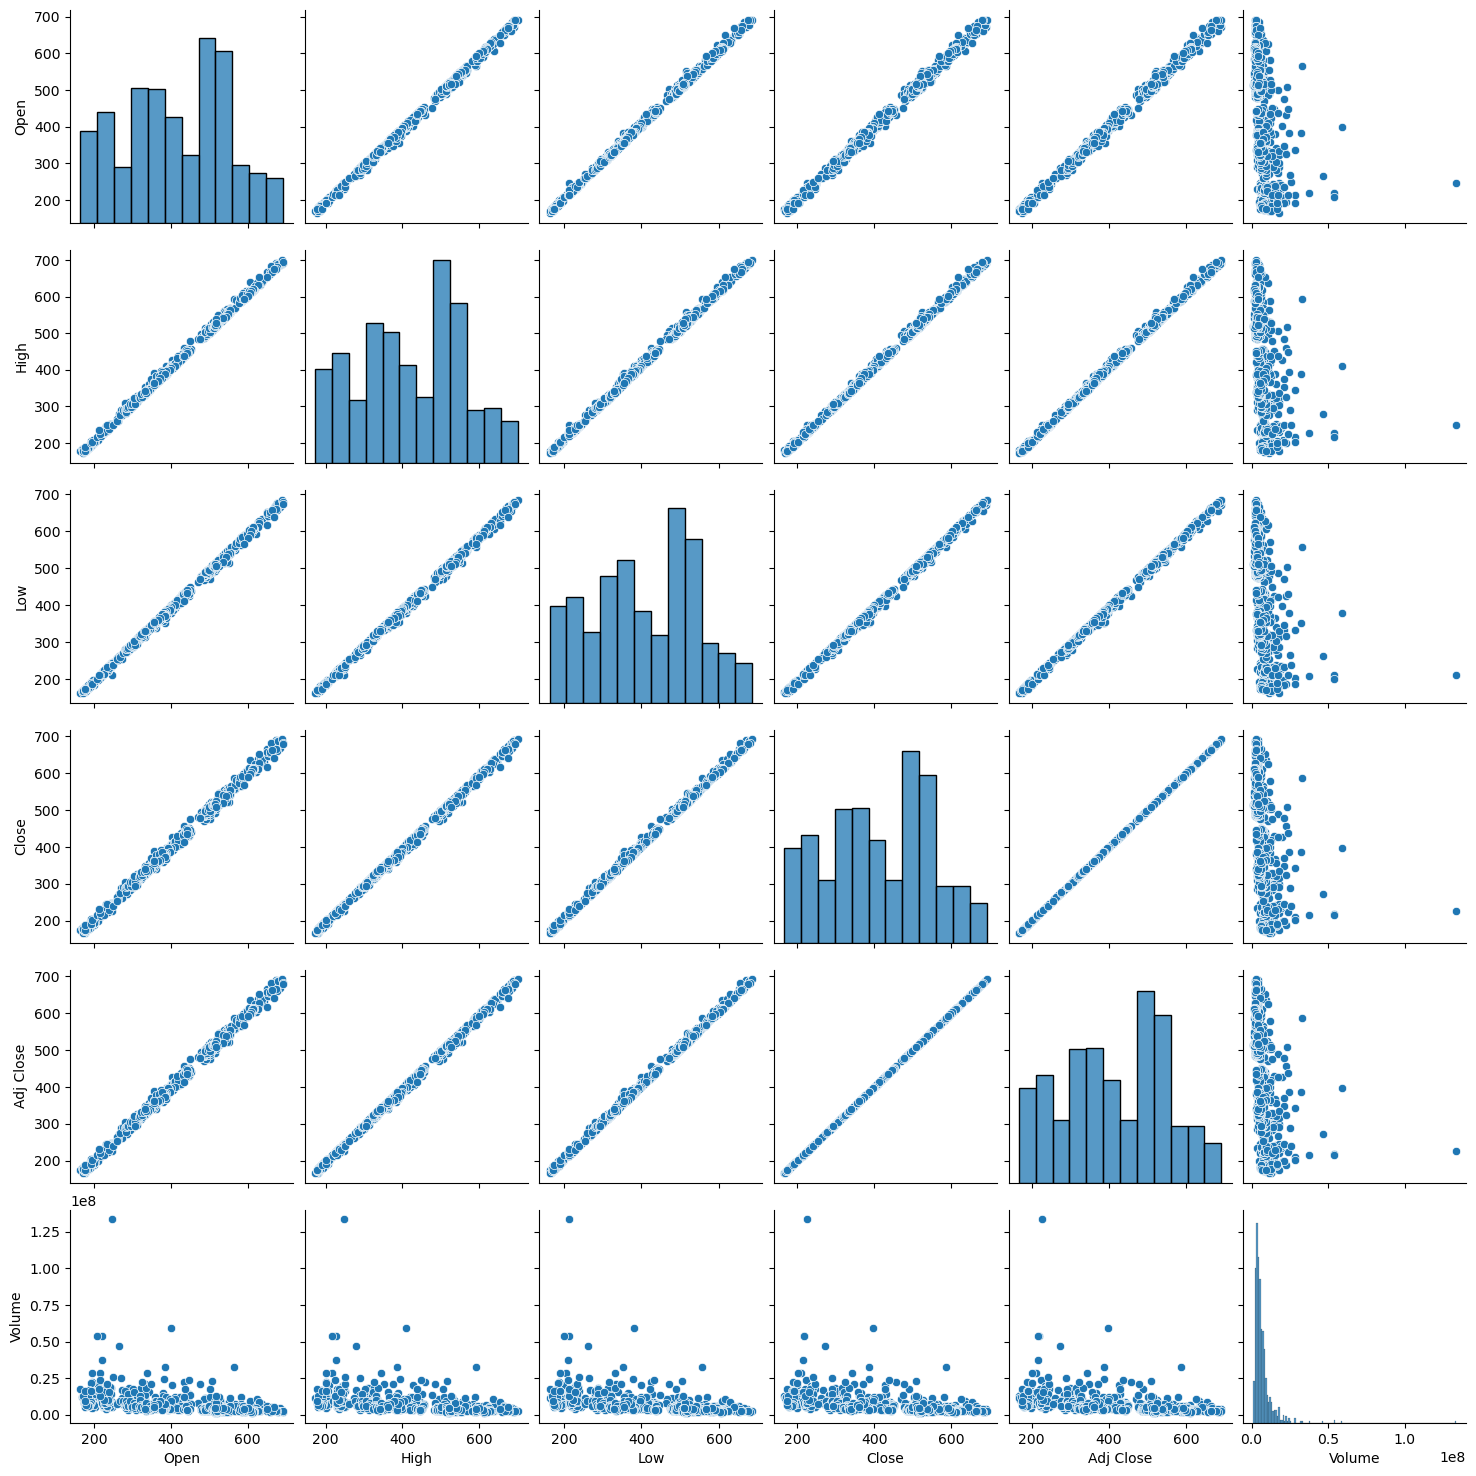

In [6]:
sns.pairplot(data)

#Observation - In this pairplots we can clearly observe that there is a colinearity between High, Open, Close, & Adj Close now we can reduce the features

# Lineplot

Using lineplot we can't understand the is it the data have any temporal trends or patterns

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


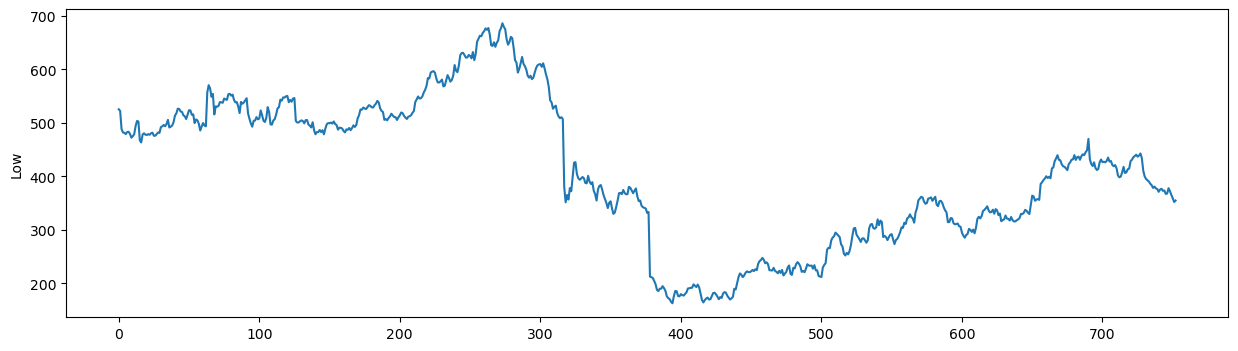

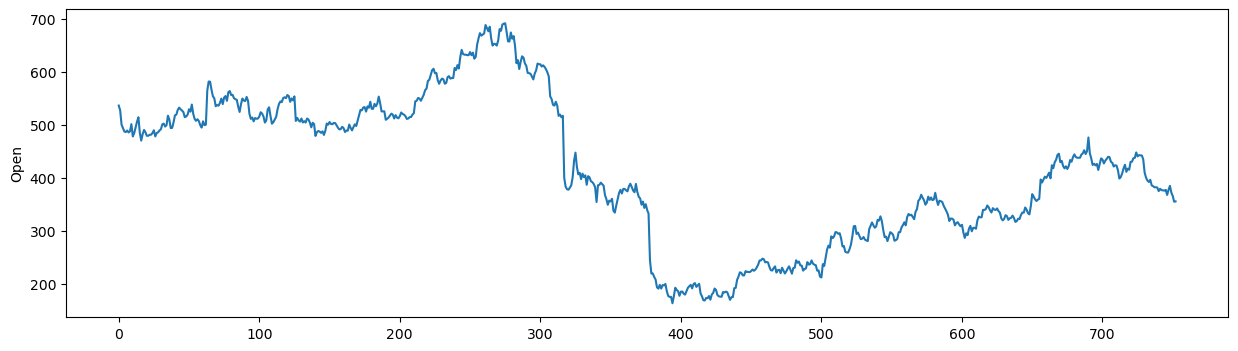

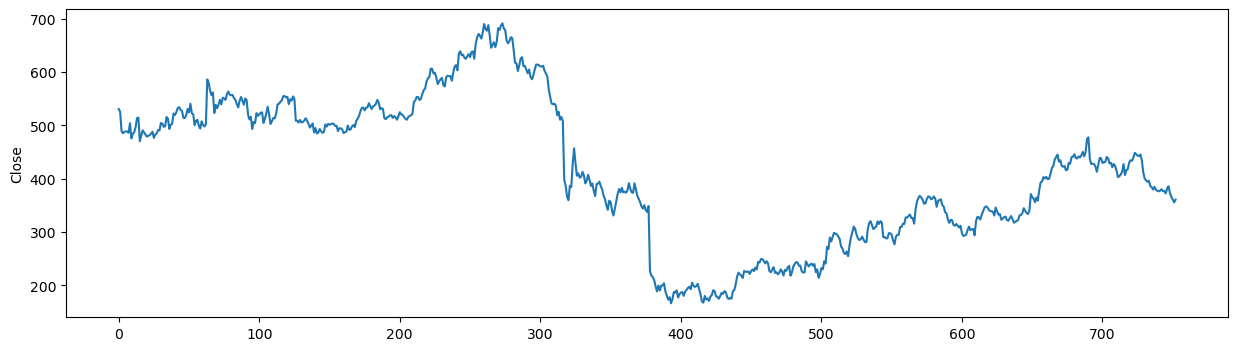

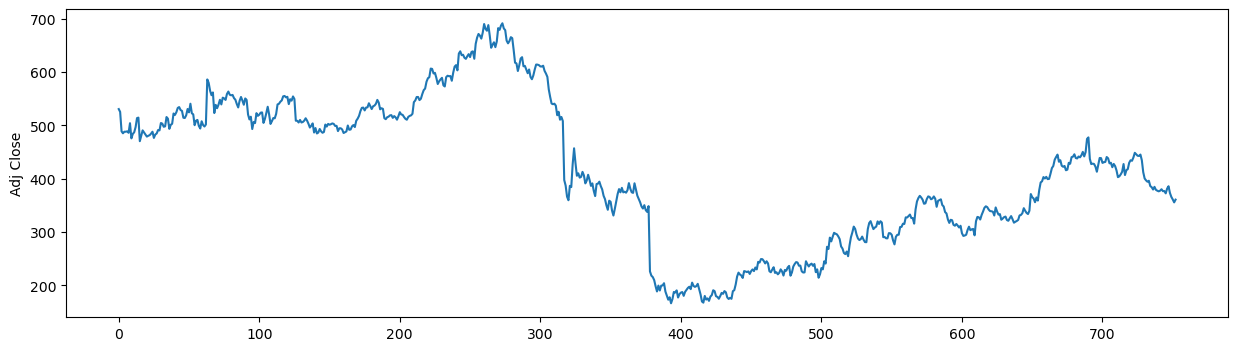

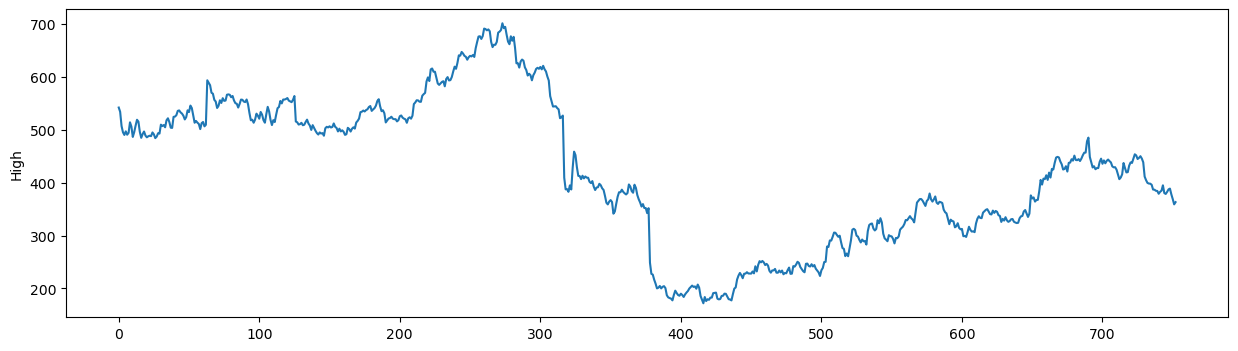

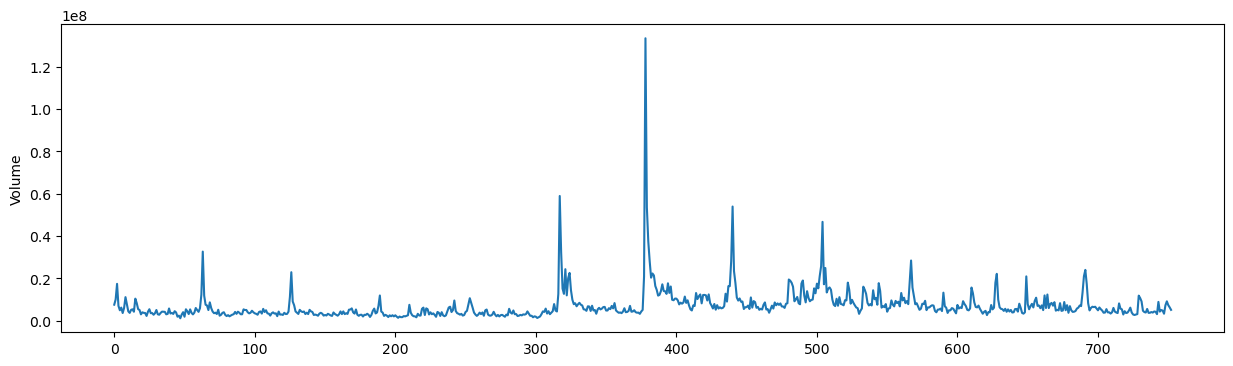

In [7]:
columns=['Low','Open','Close','Adj Close','High','Volume']
for i in columns:
  plt.figure(figsize=(15,4))
  print(sns.lineplot(data[i]))


In here all of columns are simillar expect volume

### **Boxplot**

The boxplot is useful for understanding the central tendency and spread of the data,as well as any outliers

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


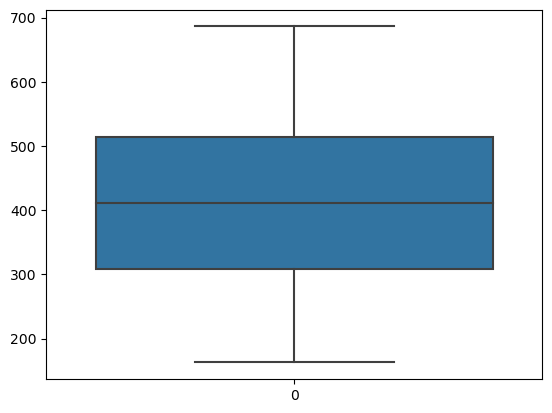

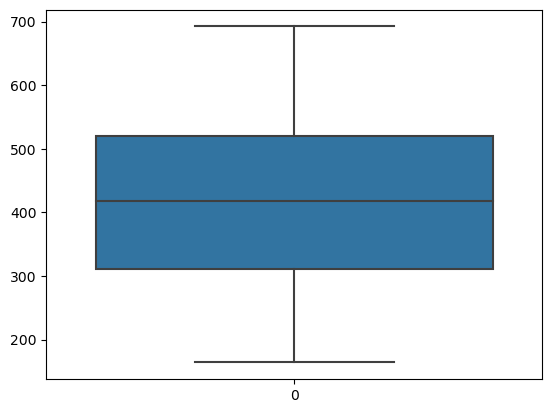

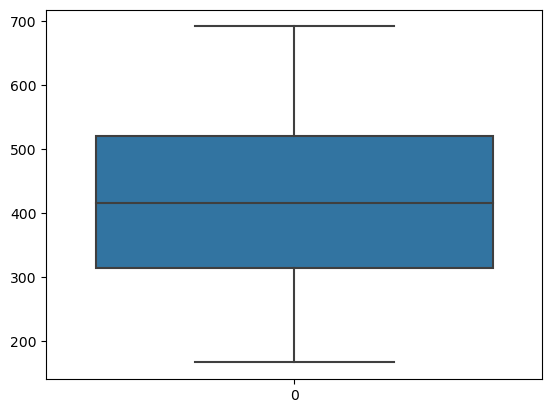

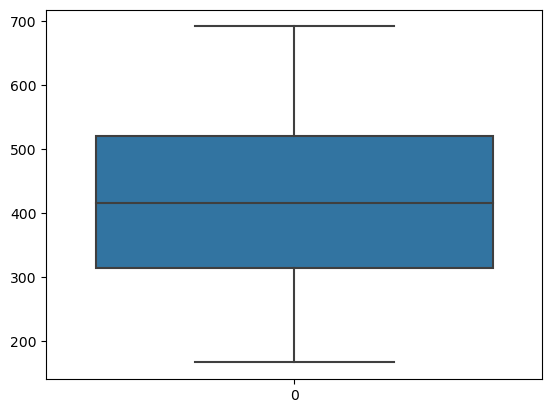

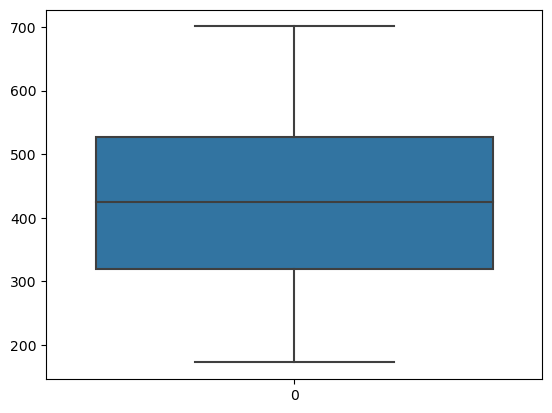

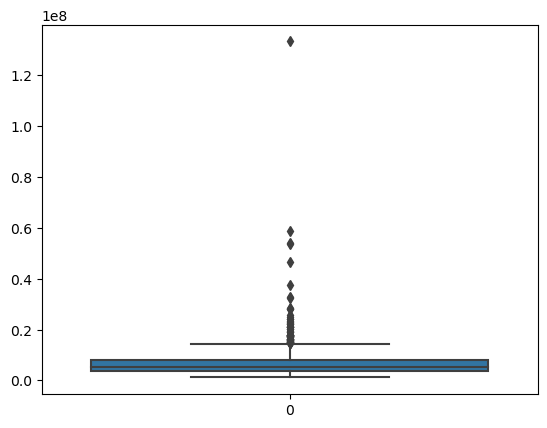

In [8]:
columns=['Low','Open','Close','Adj Close','High','Volume']
for i in columns:
  plt.figure()
  print(sns.boxplot(data[i]))



Here we can observe that there are outliers in the volume boxplot

## **Distplot**

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


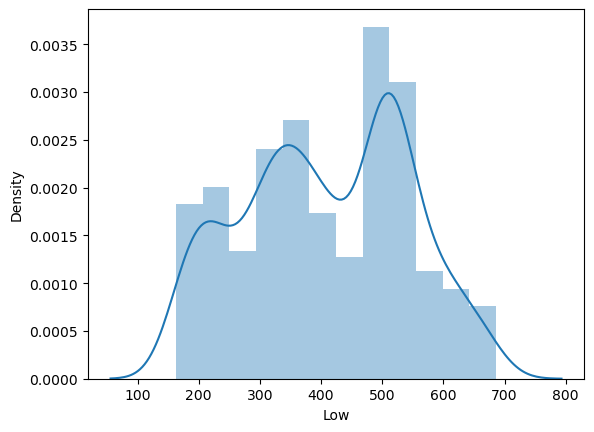

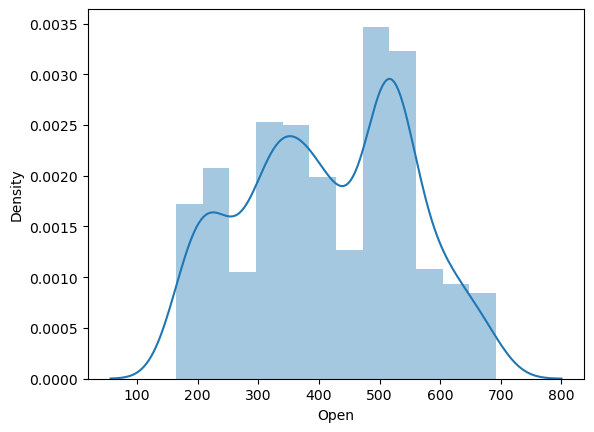

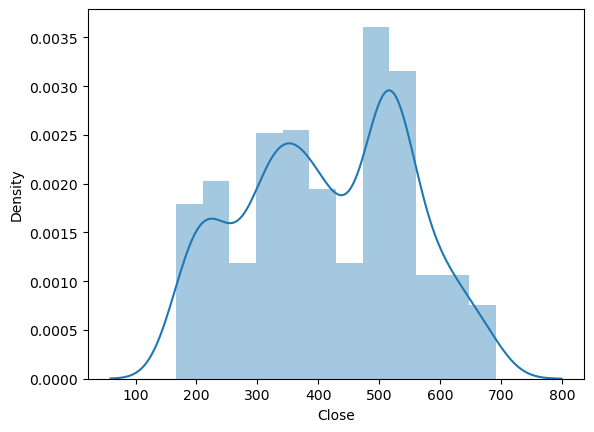

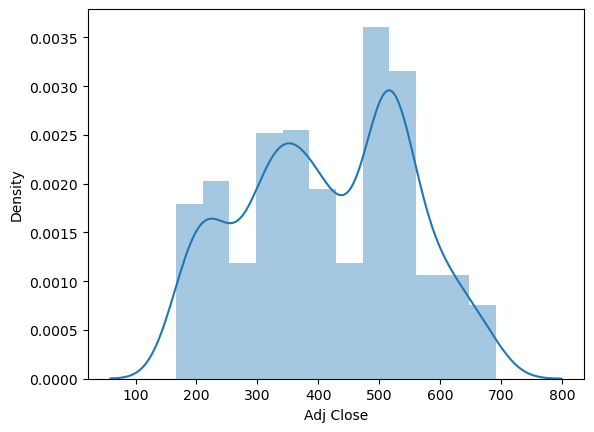

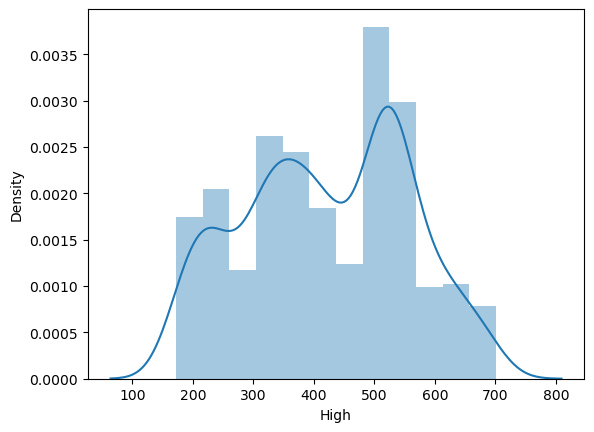

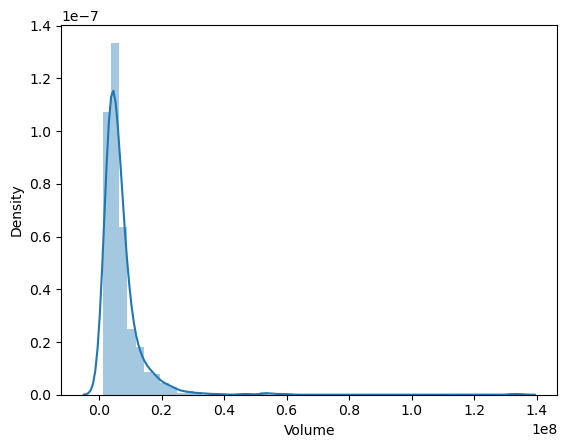

In [9]:
columns=['Low','Open','Close','Adj Close','High','Volume']
for i in columns:
  plt.figure()
  print(sns.distplot(data[i]))

Here we can see two peaks in Open, High,Low, Close and Adj Close it is showing that stock prices are varied significantly in the follwing data.
In Volume data shows that it is Left skewed.

In [10]:
data=data.drop(columns=['Open','High','Low','Adj Close','Volume'])
data.head()

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999


We have droped unwanted columns to improve the accuracy

In [11]:
data

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [12]:
data1=data.copy()
data1.set_index('Date',inplace=True)

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are important tools in time series analysis and forecasting,The ACF plot shows the correlation between a time series and its lagged values at different time lags.ACF plots are useful for identifying the order of an autoregressive (AR) model. The PACF plot shows the partial correlation between a time series and its lagged values, controlling for the intermediate lags. It is useful for identifying the order of a moving average (MA) model. The combined use of ACF and PACF plots can help in determining appropriate orders for time series models like AR, MA, and ARMA, which are essential for forecasting future values and analyzing the underlying patterns in the data

# AFC(Auto Correlation Function)

In [13]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [14]:
acf_values=acf(data['Close'])
np.round(acf_values,2)

array([1.  , 1.  , 0.99, 0.99, 0.98, 0.98, 0.97, 0.97, 0.97, 0.96, 0.96,
       0.96, 0.95, 0.95, 0.94, 0.94, 0.93, 0.93, 0.92, 0.92, 0.91, 0.91,
       0.9 , 0.9 , 0.89, 0.89, 0.89, 0.88, 0.88])

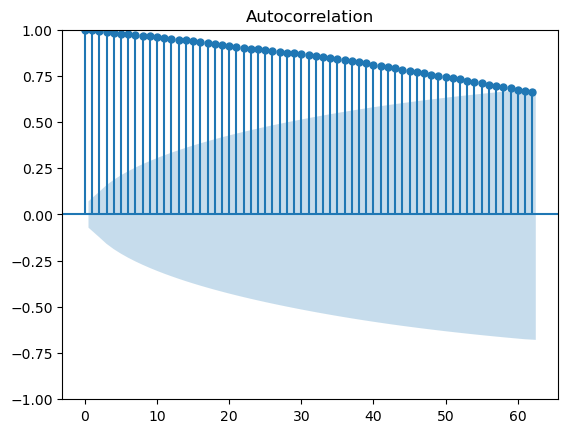

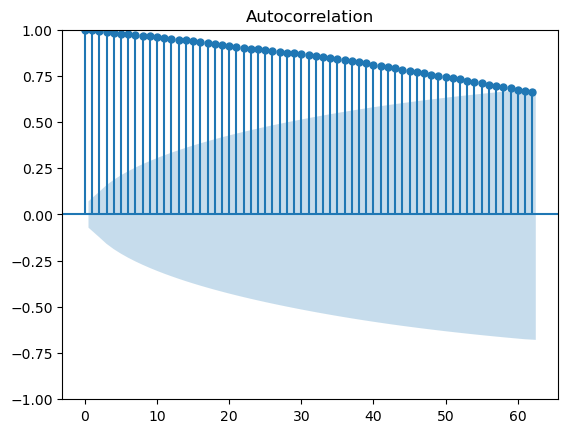

In [15]:
plot_acf(data['Close'],lags=62)

Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .



## **PACF(Partial AutoCorrelation Function)**

In [16]:
pacf_values=pacf(data['Close'])
np.round(pacf_values,2)

array([ 1.  ,  1.  , -0.03,  0.08, -0.02,  0.03,  0.03,  0.03,  0.01,
       -0.06, -0.02, -0.03, -0.03, -0.06, -0.08, -0.08,  0.08, -0.03,
        0.07, -0.07, -0.02, -0.02,  0.04,  0.07,  0.06,  0.01,  0.04,
       -0.01, -0.06])

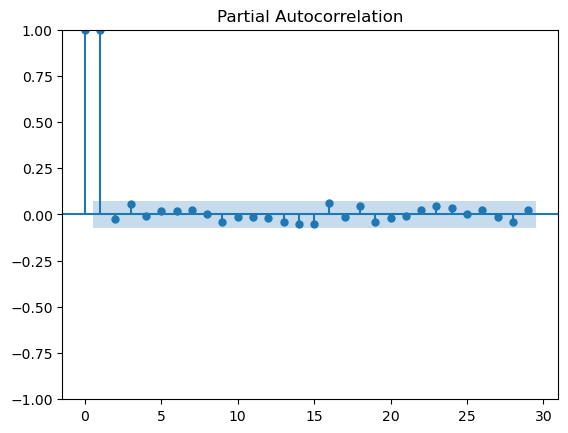

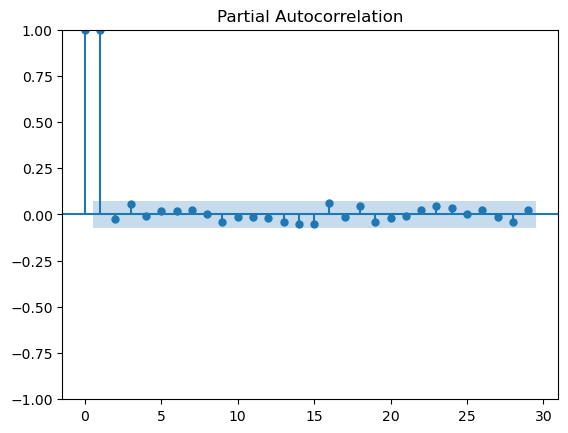

In [17]:
plot_pacf(data['Close'])

# **Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .**

# **Conversion of Non Stationary data into Stationary Data**

In [18]:
data1=data1.diff(1).dropna()
#  we convert the non stationary data into stationary data to get more accuracy

In [19]:
from statsmodels.tsa.stattools import adfuller
model=adfuller(data1,autolag='AIC')

In [20]:
print('ADF sTATITCS :',model[0])
print('P-Value :',model[1])
print('Critical Value :',model[3])

ADF sTATITCS : -26.634566685567457
P-Value : 0.0
Critical Value : 751


In [21]:
if model[1]<0.05:
  print('Data is Stationery')
else:
  print('Data is not Stationery')

Data is Stationery


<Axes: xlabel='Date'>

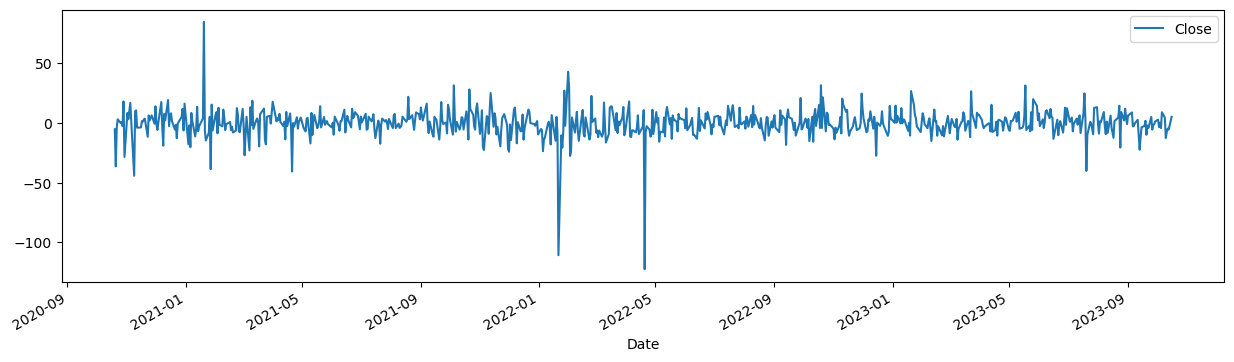

In [22]:
data1.plot(figsize=(15,4))

In [23]:
data1

,Close
Date,
2020-10-20,-5.299988
2020-10-21,-36.369995
2020-10-22,-3.819977
2020-10-23,3.049988
2020-10-26,-0.040009
...,...
2023-10-10,-12.630005
2023-10-11,-7.390014
2023-10-12,-4.729981


In [24]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')


data['Date']=pd.to_datetime(data.Date,format='%b-%y')
data['month']=data.Date.dt.strftime('%b')# month extraction
data['year']=data.Date.dt.strftime('%Y')#year extraction
data.head()

,Date,Close,month,year
0,2020-10-19,530.719971,Oct,2020
1,2020-10-20,525.419983,Oct,2020
2,2020-10-21,489.049988,Oct,2020
3,2020-10-22,485.230011,Oct,2020
4,2020-10-23,488.279999,Oct,2020


In [25]:
data.isna().sum()

Date     0
Close    0
month    0
year     0
dtype: int64

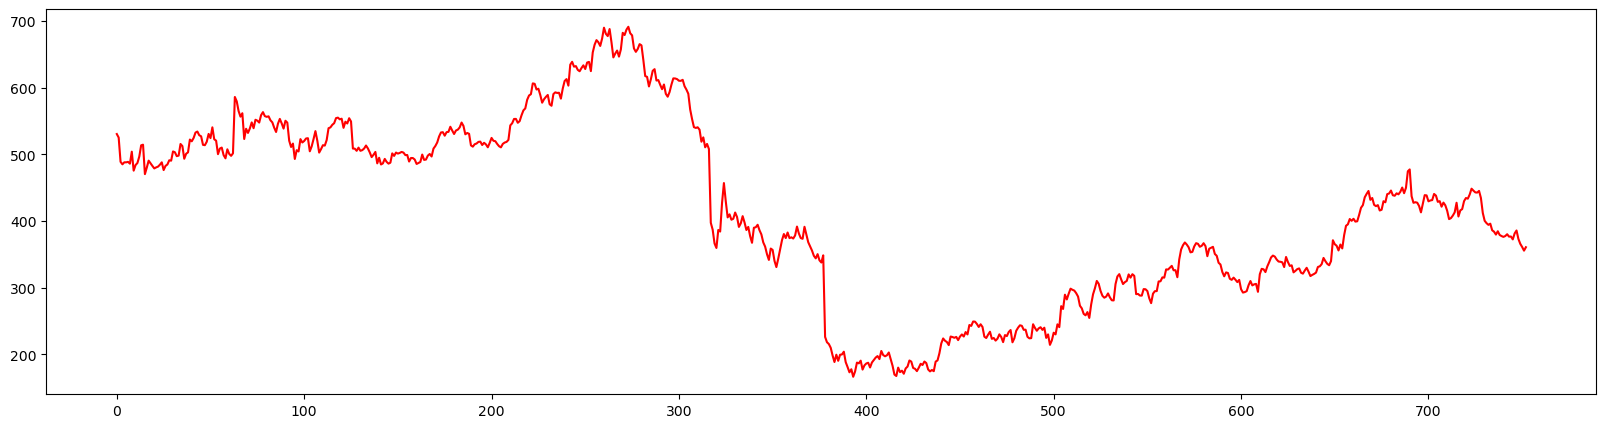

In [26]:
data['Close'].plot(figsize=(20,5),color='red')
plt.show()

<Axes: xlabel='month', ylabel='year'>

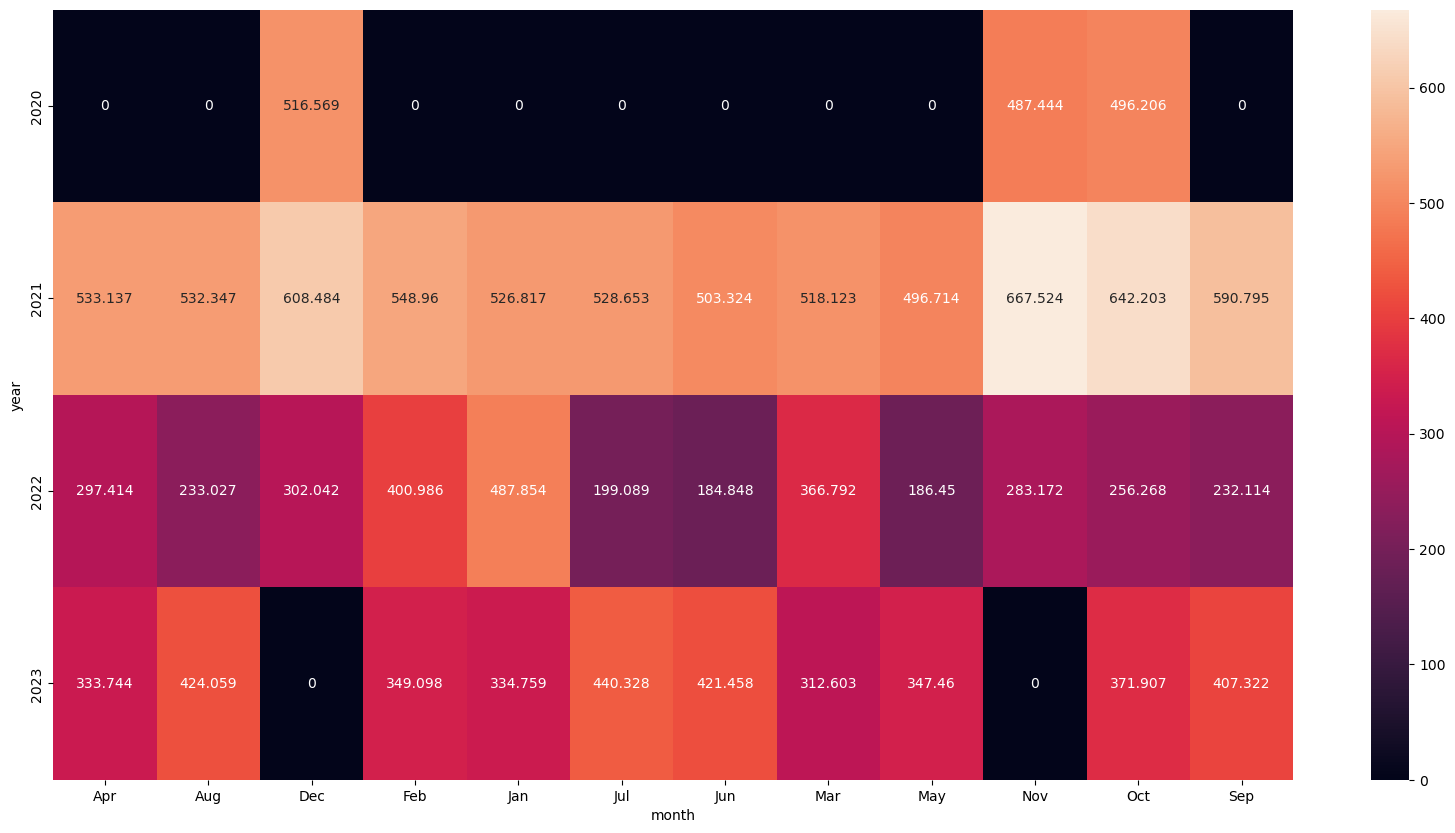

In [27]:
plt.figure(figsize=(20,10))
pivot_table= pd.pivot_table(data=data,values='Close',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='g')

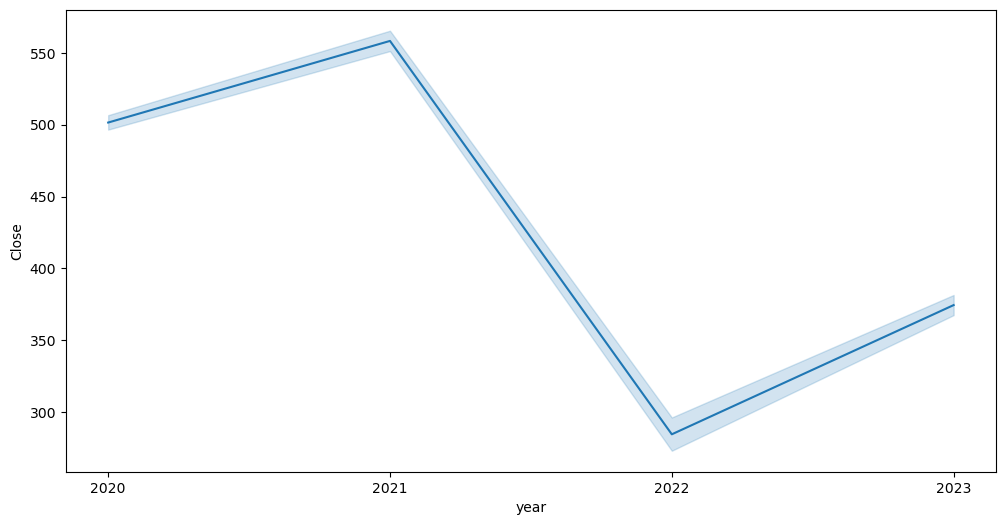

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='Close',data=data)
plt.show()

Lineplot can display the relationship between two variables

In [29]:
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
data1=pd.concat([data,month_dummies],axis=1)
data1.head()

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2020-10-19,530.719971,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False
1,2020-10-20,525.419983,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False
2,2020-10-21,489.049988,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False
3,2020-10-22,485.230011,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False
4,2020-10-23,488.279999,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False


In [30]:
data1['t']=np.arange(1,754)
data1['t_squared']=(data1['t'])**2
data1['Log_Close']=np.log(data1['Close'])
data1.head()

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Close
0,2020-10-19,530.719971,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,1,1,6.274235
1,2020-10-20,525.419983,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,2,4,6.264198
2,2020-10-21,489.049988,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,3,9,6.192465
3,2020-10-22,485.230011,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,4,16,6.184623
4,2020-10-23,488.279999,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,5,25,6.190889


In [31]:
data1

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Close
0,2020-10-19,530.719971,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,1,1,6.274235
1,2020-10-20,525.419983,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,2,4,6.264198
2,2020-10-21,489.049988,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,3,9,6.192465
3,2020-10-22,485.230011,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,4,16,6.184623
4,2020-10-23,488.279999,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,5,25,6.190889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-10-10,373.320007,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,749,561001,5.922436
749,2023-10-11,365.929993,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,750,562500,5.902442
750,2023-10-12,361.200012,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,751,564001,5.889432
751,2023-10-13,355.679993,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,752,565504,5.874031


In [32]:
Train=data1[:600]
Test=data1[600:]

# Linear Model

In [33]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Close~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_linear))**2))
print('rmse_linear :',rmse_linear)

rmse_linear : 204.18006783566634


# Exponential Model

In [34]:
exp_model=smf.ols('Log_Close~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Log_Close'])-np.array(pred_exp))**2))
print('rmse_exp :',rmse_exp)

rmse_exp : 0.6121371793783963


# Quadrative model

In [35]:
quad_model=smf.ols('Close~t+t_squared',data=Train).fit()
pred_quad=pd.Series(quad_model.predict(pd.DataFrame(Test[['t','t_squared']])))
rmse_quad=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_quad))**2))
print("rmse_quad :",rmse_quad)


rmse_quad : 299.0815614759098


# Additive Seasonality Model

In [36]:
add_sea = smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_add_sea))**2))
print('rmse_add :',rmse_add)

rmse_add : 70.17763831673352


# Additive Seasonality QT

In [37]:
add_sea_quad = smf.ols('Close~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(add_sea_quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_asq=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_model))**2))
print("rmse_asq :",rmse_asq)

rmse_asq : 471.1780621986314


# Multi Seasonality

In [38]:
mul_sea=smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_ms=np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_model))**2))
print("rmse_mulsea :",rmse_ms)

rmse_mulsea : 70.17763831673352


In [39]:
data2=pd.DataFrame({'Models':['Linear','Exponential','Quadrative Model','Additive Seasonality','Additive Seasonality QT','Multi Seasonality'],'Values':[rmse_linear,rmse_exp,rmse_quad,rmse_add,rmse_asq,rmse_ms]})
data2

,Models,Values
0,Linear,204.180068
1,Exponential,0.612137
2,Quadrative Model,299.081561
3,Additive Seasonality,70.177638
4,Additive Seasonality QT,471.178062
5,Multi Seasonality,70.177638


In [40]:
data2.sort_values('Values')

,Models,Values
1,Exponential,0.612137
3,Additive Seasonality,70.177638
5,Multi Seasonality,70.177638
0,Linear,204.180068
2,Quadrative Model,299.081561
4,Additive Seasonality QT,471.178062


# LSTM

In [41]:
!pip install tensorflow

In [42]:
!pip install scikeras

In [43]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [44]:
data1

,Date,Close,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Close
0,2020-10-19,530.719971,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,1,1,6.274235
1,2020-10-20,525.419983,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,2,4,6.264198
2,2020-10-21,489.049988,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,3,9,6.192465
3,2020-10-22,485.230011,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,4,16,6.184623
4,2020-10-23,488.279999,Oct,2020,False,False,False,False,False,False,False,False,False,False,True,False,5,25,6.190889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-10-10,373.320007,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,749,561001,5.922436
749,2023-10-11,365.929993,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,750,562500,5.902442
750,2023-10-12,361.200012,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,751,564001,5.889432
751,2023-10-13,355.679993,Oct,2023,False,False,False,False,False,False,False,False,False,False,True,False,752,565504,5.874031


In [45]:
data1['Date']=pd.to_numeric(data1['Date'])

In [46]:
data1=pd.get_dummies(data1['month'])

In [47]:
data3=data.copy()
data3.drop(['month','year'],axis=1,inplace=True)

In [48]:
data3.head(2)

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983


In [49]:
data3['Date']=pd.to_datetime(data3['Date'])
data3.set_index('Date',inplace=True)
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(data3[['Close']])

In [50]:
def create_sequences(data,order_length):
  sequences=[]
  targets=[]
  for i in range(len(data)-order_length):
    seq=data[i:i+order_length]
    target=data[i+order_length]
    sequences.append(seq)
    targets.append(target)
  return np.array(sequences),np.array(targets)

In [51]:
order_length=4
x,y=create_sequences(df_scaled,order_length)
train_size=int(len(x) * 0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test= x_test.reshape((x_test.shape[0],x_test.shape[1],1))


In [52]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(order_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=2)
y_pred = model.predict(x_test)

# Invert predictions and targets to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
38/38 - 4s - loss: 0.1897 - 4s/epoch - 108ms/step
Epoch 2/50
38/38 - 0s - loss: 0.0250 - 253ms/epoch - 7ms/step
Epoch 3/50
38/38 - 0s - loss: 0.0094 - 253ms/epoch - 7ms/step
Epoch 4/50
38/38 - 0s - loss: 0.0040 - 248ms/epoch - 7ms/step
Epoch 5/50
38/38 - 0s - loss: 0.0016 - 254ms/epoch - 7ms/step
Epoch 6/50
38/38 - 0s - loss: 0.0013 - 270ms/epoch - 7ms/step
Epoch 7/50
38/38 - 0s - loss: 0.0013 - 268ms/epoch - 7ms/step
Epoch 8/50
38/38 - 0s - loss: 0.0012 - 285ms/epoch - 8ms/step
Epoch 9/50
38/38 - 0s - loss: 0.0012 - 254ms/epoch - 7ms/step
Epoch 10/50
38/38 - 0s - loss: 0.0012 - 254ms/epoch - 7ms/step
Epoch 11/50
38/38 - 0s - loss: 0.0012 - 253ms/epoch - 7ms/step
Epoch 12/50
38/38 - 0s - loss: 0.0012 - 270ms/epoch - 7ms/step
Epoch 13/50
38/38 - 0s - loss: 0.0012 - 269ms/epoch - 7ms/step
Epoch 14/50
38/38 - 0s - loss: 0.0011 - 253ms/epoch - 7ms/step
Epoch 15/50
38/38 - 0s - loss: 0.0011 - 253ms/epoch - 7ms/step
Epoch 16/50
38/38 - 0s - loss: 0.0011 - 253ms/epoch - 7ms/step
Ep

In [53]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 11.619798391291658


In [54]:
import numpy as np

# Sample array with potential issues
data = np.array([1.0, 2.0, np.inf, 1e40], dtype=np.float32)

# Check for infinite or large values
if np.any(np.isinf(data)) or np.any(np.abs(data) > 1e38):
    # Handle these values (e.g., replace with valid values or remove)
    data[np.isinf(data)] = 0  # Replace inf with 0
    data[np.abs(data) > 1e38] = 1e38  # Clip large values to a reasonable range

# Now you can perform your calculations without encountering the error


In [55]:
future_data=df_scaled[-order_length:].reshape((1,order_length,1))
forecast=[]

for i in range(365):
  prediction=model.predict(future_data)
  forecast.append(prediction[0,0])
  future_data=np.append(future_data[:, 1:, :],prediction.reshape(1, 1, 1),axis=1)
  forecast_inv = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
  last_date=data3.index.max()
  forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


In [56]:
forecast_df=pd.DataFrame({'Date': forecast_dates, 'Close': forecast_inv.flatten()})
print(forecast_df)

          Date       Close
0   2023-10-17  357.678741
1   2023-10-18  356.042603
2   2023-10-19  355.112000
3   2023-10-20  354.307526
4   2023-10-21  352.902802
..         ...         ...
360 2024-10-11  199.283768
361 2024-10-12  199.283112
362 2024-10-13  199.282501
363 2024-10-14  199.281891
364 2024-10-15  199.281311

[365 rows x 2 columns]


In [57]:
data3.reset_index('Date',inplace=True)

In [58]:
data3

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [59]:
merged_data=pd.concat([data3,forecast_df],ignore_index=True)

In [60]:
merged_data

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
1113,2024-10-11,199.283768
1114,2024-10-12,199.283112
1115,2024-10-13,199.282501
1116,2024-10-14,199.281891


In [61]:
merged_data.to_csv(r"D:\Project_csp\merged_data.csv")


In [62]:
#import streamlit as st
#from tensorflow.keras.models import load_model

In [63]:
#import plotly.express as px
#px.line(filtered_data,x='Date',y='Close',title='Predicted_Stock')
#fig.show()

In [64]:
import pandas as pd
from prophet import Prophet

# Import the Prophet library
import prophet

In [65]:
# Reset index and keep only 'Date' and 'Close' columns
data = data3.reset_index()[['Date', 'Close']]
data.columns = ['ds', 'y']

In [66]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [67]:
train_data

,ds,y
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
597,2023-03-06,312.029999
598,2023-03-07,308.470001
599,2023-03-08,311.790009
600,2023-03-09,297.779999


In [68]:
#fit the Prophet model
model = Prophet()
model.fit(train_data)

11:35:41 - cmdstanpy - INFO - Chain [1] start processing
11:35:42 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
# Create a DataFrame to hold the future dates for forecasting
future_dates = pd.date_range(start=data['ds'].iloc[-1], periods=len(test_data), freq='D')
future = pd.DataFrame({'ds': future_dates})
future

,ds
0,2023-10-16
1,2023-10-17
2,2023-10-18
3,2023-10-19
4,2023-10-20
...,...
146,2024-03-10
147,2024-03-11
148,2024-03-12
149,2024-03-13


In [72]:
forecast = model.predict(future)

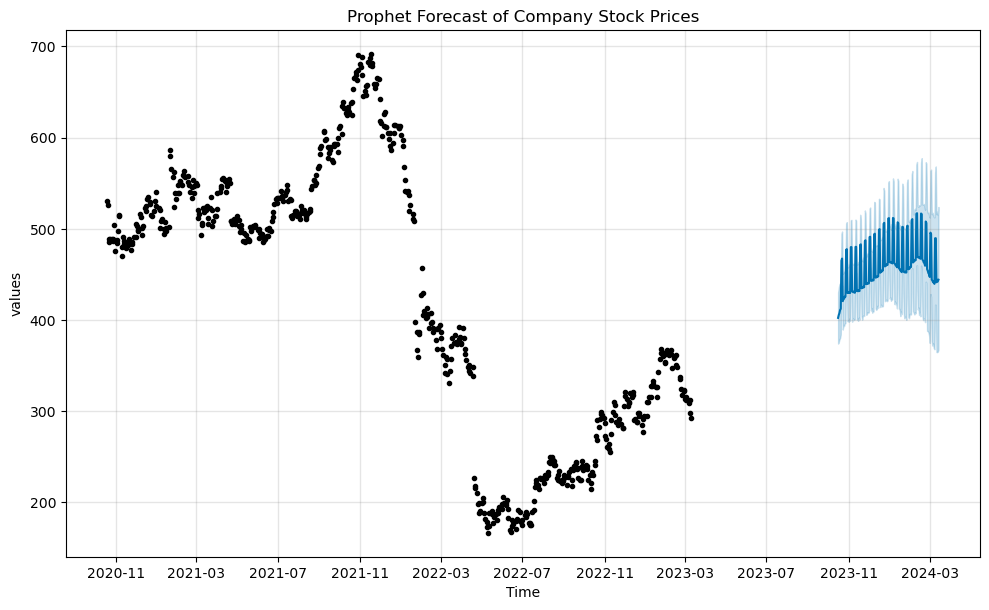

In [73]:
# Plot the actual data and the forecast
fig = model.plot(forecast)
plt.xlabel('Time')
plt.ylabel('values')
plt.title('Prophet Forecast of Company Stock Prices')
plt.show()